<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Optimization and Learning**
**Teo Nordström**

# **Abstract**

This file contains the solutions to the three mandatory problems from Lab6 in DD2363, in addition to the solution to one of the optional problems. It is based upon pseudocode and info found in *Methods in Computational Science* by Johan Hoffman (2021)

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license.

In [ ]:
"""This file is based on a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# TEMPLATE INFO:
# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# CODE INFO:
# Code written by Teo Nordström 2024, no license.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

These are the neccessary modules for everything in this file to work.

In [ ]:
from google.colab import files

import numpy as np
from matplotlib import pyplot as plt



# **Introduction**

All solutions will be partially or entirely based upon the book *Methods in Computational Science* by Johan Hoffman (2021). In the text, it will be referred to as the "course book".

# Gradient Descent Method in $R^n$
The Gradient Descent method or in this case Gradient Descent Minimization is an iterative method used to find critical points in objective functions. It uses the gradient to know which direction to step, and will continue doing so until the gradient reaches close enough to zero, or will continue forever if there is no critical point. For the objective function $f(x)$ we can see that the approximation $x^{(k+1)}$ from the gradient descent method can be calculated using
$$x^{k+1} = x^{k} - a^{k}∇f(x^{k})$$
where $x^{(0)}$ is an initial guess.
The $a^{k}$ can either be picked as an arbitrary value which may or may not work for all solutions and could overshoot the critical point, or it could be calculated for each $k$ using an iterative line search method based on the unitary function for the search direction
$$uni \_f(s) = f( x - s∇f(x))$$


# **Method**

# Gradient Descent Method in $R^n$

To perform the Gradient Descent in $R^n$ we first have to compute the gradient for the function in a spot. This is done through partial derivation on all of the indices of the answer vector $x$ in $f$. After this is done we have a vector $Df$ in which each index $i$ is the partial derivative $\frac{df}{dx_i}$. This will then be used together with a line search* to step through the function until we get to a point where the norm of the gradient approaches zero. When the gradient is at zero we know we are at a critical point in the function.

This gradient descent algorithm was based on Algorithm 15.1 from the Course Book, while the line search was based upon information found on [Wikipedia](https://en.wikipedia.org/wiki/Golden-section_search).

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt


def compute_gradient(f, x:np.ndarray):
    n = x.size
    Df = np.zeros(n)
    for i in range(n):
        h = np.zeros(n)
        h[i] += 10**-6
        numerator = f(x + h) - f(x - h)
        Df[i] = numerator / (2 * h[i])
    return Df


def line_search(f, Df, x, b):
    def uni_f(s):
        return f(x - s * Df)

    a = 0
    golden_ratio = (5**0.5 + 1) / 2
    while abs(b - a) > 10**-5:
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio
        if uni_f(c) < uni_f(d):
            b = d
        else:
            a = c

    return (b + a) / 2


def gradient_descent_method(f, x0:np.ndarray): # Algo 15.1
    x = x0
    Df = compute_gradient(f, x)
    point_list = [x]
    alpha = 5

    iters = 0
    while np.linalg.norm(Df) > 10**-6 and iters < 250:
        Df = compute_gradient(f, x)
        alpha = line_search(f, Df, x, alpha)
        x = x - alpha * Df
        point_list.append(x)
        iters += 1
    return x, point_list


def gd_f(x):
    return (x[0] - 1) ** 2 + (x[1] + 5) ** 2 + (x[2] - 2)**2


print(gradient_descent_method(gd_f, np.array([0, 0, 0]))[0])

[ 1. -5.  2.]


# **Results**

In this section tests will be performed to verify that the solutions are correct

# Gradient Descent Method in $R^n$
To test the Gradient Descent Method we use a simple $R^2$ equation of which we know the answers. Since we only use parabolas at the form $(x_i - c_i)^2$ we know that there will be only one global minima and that it will be at the spot where all $x_i = c_i$. We generate $c_i$ for all $x_i$ and then check if the function gets the same values for all. This can be seen that they always do. We also plot the $x$ values calculated by the function (solid lines) together with the real answer (dotted lines) and can see that the function consistently converges to the correct answer, and does this very quickly due to the line search.


Test 1, Real Sol. [-8.125, 6.388], Func sol. [-8.125  6.388], Diff. [1.77635684e-15 8.88178420e-16]


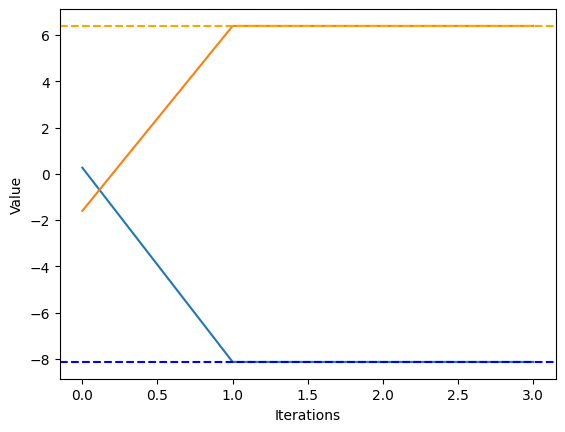

Test 2, Real Sol. [7.169, 8.071], Func sol. [7.169 8.071], Diff. [8.88178420e-16 1.77635684e-15]


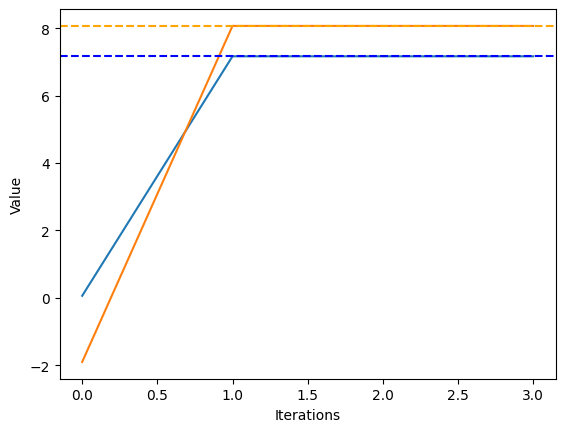

Test 3, Real Sol. [3.873, -8.435], Func sol. [ 3.873 -8.435], Diff. [4.44089210e-16 1.77635684e-15]


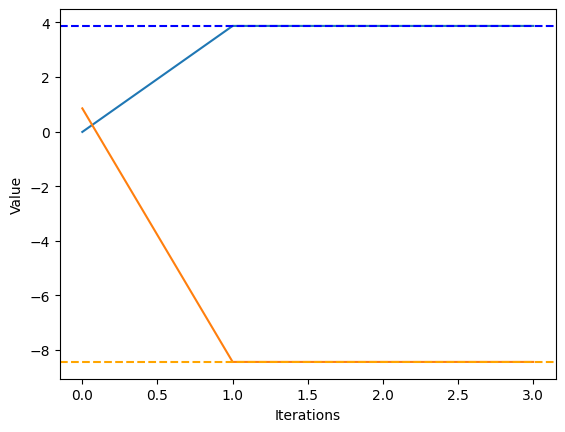

In [3]:
def gd_test(iters):
    for test in range(iters):
        c = [round(np.random.rand() * 20 - 10, 3) for _ in range(2)]

        def f(x):
            return (x[0] - c[0]) ** 2 + (x[1] - c[1]) ** 2

        ans, point_list = gradient_descent_method(f, np.array([np.random.rand() * 4 - 2, np.random.rand() * 4 - 2]))

        print(f"Test {test+1}, Real Sol. {c}, Func sol. {ans}, Diff. {abs(c - ans)}")

        plt.plot(point_list)
        plt.axhline(y=c[0], color="blue", linestyle="dashed")
        plt.axhline(y=c[1], color="orange", linestyle="dashed")
        plt.xlabel("Iterations")
        plt.ylabel("Value")
        plt.show()


gd_test(3)

# **Discussion**

The implementation this week is quite simple, but it took a little longer than I would prefer to admit to find all the neccessary information. All in all though, optimisation is an intriguing problem that is interesting to try and solve.